# Adaboost

微观上，提升法（boosting）就是在分类问题中，每次放大错误样本的权重，学习多个分类器，前一个分类器的结果是下一个分类器的输入，如此迭代，最后将这些线性分类器线性组合得到最终分类器。是一个从弱学习算法提升到强学习算法的过程

宏观上，提升法的代表 Adaboost 算法是模型为加法模型，损失函数为指数函数，学习算法为前向分布算法的二分类学习方法。

**Adaboost 算法描述**

输入：训练数据集$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$，其中 $x_{i} \in \mathcal{X} \subseteq \mathbf{R}^{n}, y_{i} \in \mathcal{Y} = \{-1,+1\}$；弱学习算法

输出：最终分类器 $G(x)$

1. 初始化数据的权重分布

$$
D_{1}=\left(w_{11}, \cdots, w_{1 i}, \cdots, w_{1 N}\right), \quad w_{1 i}=\frac{1}{N}, \quad i=1,2, \cdots, N
$$

2. 对 $m = 1,2,\ldots,M$

   1. 在权重分布为 $G_m$ 的数据集上学习基本分类器 $G_{m}(x): \mathcal{X} \rightarrow\{-1,+1\}$
   2. 计算 $G_m$ 上的分类误差率  $e_{m}=\sum_{i=1}^{N} P\left(G_{m}\left(x_{i}\right) \neq y_{i}\right)=\sum_{i=1}^{N} w_{m i} I\left(G_{m}\left(x_{i}\right) \neq y_{i}\right)$
   3. 计算 $G_m(x)$ 的系数 $\alpha_{m}=\frac{1}{2} \log \frac{1-e_{m}}{e_{m}}$ ，取自然对数
   4. 更新权重分布

   $$
   \begin{array}{c}{D_{m+1}=\left(w_{m+1,1}, \cdots, w_{m+1, i}, \cdots, w_{m+1, N}\right)} \\ {w_{m+1, i}=\frac{w_{m i}}{Z_{m}} \exp \left(-\alpha_{m} y_{i} G_{m}\left(x_{i}\right)\right), \quad i=1,2, \cdots, N}\end{array}
   $$

   $Z_{m}=\sum_{i=1}^{N} w_{m i} \exp \left(-\alpha_{m} y_{i} G_{m}\left(x_{i}\right)\right)$ 是规范化因子，使 $D_{m+1}$ 成为一个概率分布

3. 构建基本分类器的线性组合 $f(x)=\sum_{m=1}^{M} \alpha_{m} G_{m}(x)$，得到最终分类器

$$
G(x) =\operatorname{sign}(f(x))=\operatorname{sign}\left(\sum_{m=1}^{M} \alpha_{m} G_{m}(x)\right) 
$$

adaboost的两个特点：

- 不改变所给数据而是改变数据权值分布，使训练数据对不同分类器起不同作用
- 利用基本分类器的线性组合构建最终分类器

**加法模型解释**

当把adaboost视为前向分步算法的一个实现，模型为加法模型 $f(x)=\sum_{m=1}^{M} \beta_{m} b\left(x ; \gamma_{m}\right)$，指数损失函数，每一步实际是在极小化损失函数
$$
\left(\beta_{m}, \gamma_{m}\right)=\arg \min _{\beta, \gamma} \sum_{i=1}^{N} L\left(y_{i}, f_{m-1}\left(x_{i}\right)+\beta b\left(x_{i} ; \gamma\right)\right)
$$
求取参数 $\beta_{m}, \gamma_{m}$

# 提升树

提升树是以分类树或回归树为基本分类器的提升方法。前者是二叉分类树用指数损失函数，后者是二叉回归树用平方误差损失函数。分类问题算作是 adaboost 算法的特例，对于回归问题实际是在拟合残差。

回归树可以表示为 $T(x ; \Theta)=\sum_{j=1}^{J} c_{j} I\left(x \in R_{j}\right)$，$R_j$ 是输入空间 $\mathcal{X}$ 划分出的若干不相交区域之一，$c_j$ 是其上输出常量，$\Theta$ 是决策树参数，表示各划分和各区域上的常数，$J$ 是叶结点数

**回归问题提升树算法**

输入：训练数据集 $T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$ ，$x_{i} \in \mathcal{X} \subseteq \mathbf{R}^{n}, y_{i} \in \mathcal{Y}  \subseteq \mathbf{R}^{n}$；

输出：提升树 $f_M(x)$

1. 初始化 $f_0(x) = 0$

2. 对 $m = 1,2,\ldots,M$

   1. 在树上计算残差

   $$
   r_{m i}=y_{i}-f_{m-1}\left(x_{i}\right), \quad i=1,2, \cdots, N
   $$

   2. 拟合残差得到回归树 $T(x ; \Theta_m)$
   3. 更新 $f_{m}(x)=f_{m-1}(x)+T\left(x ; \Theta_{m}\right)$

3. 得到问题的提升回归树 $f_{M}(x)=\sum_{m=1}^{M} T\left(x ; \Theta_{m}\right)$

# 算法实现

**导入相关库**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**硬件与版本信息**

In [2]:
%load_ext watermark
%watermark -v -m -p ipywidgets,matplotlib,numpy,pandas,sklearn

CPython 3.7.3
IPython 7.6.1

ipywidgets 7.5.0
matplotlib 3.1.0
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


**Adaboost 分类树**

In [3]:
class DecisionTreeStump(object):
    '''决策树桩
    
    label:
        样本是正类（+1）还是负类（-1）,默认为正类
    feture_index:
        分类特征索引
    threshold:
        划分阈值，低于threshold 归负类，反之为正类
    alpha:
        分类准确率
    '''
    def __init__(self):
        self.label = 1
        self.feture_index = None
        self.threshold = None
        self.alpha = None

In [4]:
class Adaboost(object):
    '''自适应提升分类树
    
        使用高度为 2 的二叉分类树作为基分类器的 adaboost 算法实现
        
    clf_num:
        基分类器数量
    '''
    
    def __init__(self, clf_num = 5):
        
        self.clf_num = clf_num
        
    def fit(self, X_train, y_train):
        
        n_samples, n_features = np.shape(X_train)
        
        # 初始时样本权重均匀分布
        weight = np.full(n_samples, (1 / n_samples))
        
        
        # 训练各基分类器
        self.clfs = []
        
        for i in range(self.clf_num):
            
            clf = DecisionTreeStump()
            
            min_error = float('inf')
            
            for feature_i in range(n_features):
                
                feature_values = np.expand_dims(X_train[:,feature_i], axis=1)
                
                unique_values = np.unique(feature_values)
                
                for threshold in unique_values:
                    label = 1
                    
                    pred = np.ones(np.shape(y_train))
                    pred[X_train[:,feature_i] < threshold] = -1
    
                    err = sum(weight[y_train != pred])
              
                    
                    # 保证 alpha 和 err 的反比关系，错误率过半则反转类别
                    if err > 0.5:
                        err = 1 - err
                        label = -1
                       
                    # 保留误差最小的特征
                    if err < min_error:
                        min_error = err
                        clf.label = label
                        clf.threshold = threshold
                        clf.feature_index = feature_i
            
            # 更新分类器权重
            clf.alpha = 0.5 * math.log((1-min_error) / (min_error + 1e-10))
            
            # 更新样本权重分布
            pred = np.ones(np.shape(y_train))
            neg_index = (clf.label * X_train[:,clf.feature_index] < clf.label * clf.threshold)
            pred[neg_index] = -1
            weight *= np.exp(-clf.alpha * y_train * pred)
            weight /= sum(weight)
            
            self.clfs.append(clf)
            
    def predict(self, X_test):
        
        n_samples = np.shape(X_test)[0]
        y_pred = np.zeros((n_samples, 1))
        
        for clf in self.clfs:
            
            pred = np.ones(np.shape(y_pred))
            
            neg_index = (clf.label * X_test[:,clf.feature_index] < clf.label * clf.threshold)
            
            pred[neg_index] = -1
            
            y_pred += clf.alpha * pred
            
        y_pred = np.sign(y_pred).flatten()
        
        return y_pred
        

# 模型测试

**导入数据**

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

def create_data():
    data = load_digits()
    X = data.data
    y = data.target
    
    digit_one = 1
    digit_two = 8
    
    idx = np.append(np.where(y == digit_one)[0],np.where(y == digit_two)[0])
    y = data.target[idx]
    
    y[y == digit_one] = -1
    y[y == digit_two] = 1
    X = data.data[idx]
    
    return X, y

In [6]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**训练模型**

In [7]:
adaboost = Adaboost()
adaboost.fit(X_train, y_train)

**预测与可视化**

In [8]:
y_pred = adaboost.predict(X_test)
accuracy = np.sum(y_pred == y_test, axis=0) / len(y_test)
print("Accuracy: %f" % accuracy)

Accuracy: 0.906542


In [9]:
def transform(X, dim):
    '''PCA降维转换'''
    
    n_samples = X.shape[0]
    covariance_matrix = (1 / (n_samples - 1)) * (X - X.mean(axis=0)).T.dot(X - X.mean(axis=0))
    covariance_matrix = np.array(covariance_matrix, dtype=float)
    
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # 
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx][:dim]
    eigenvectors = np.atleast_1d(eigenvectors[:,idx])[:,:dim]
    
    X_transformed = X.dot(eigenvectors)
    
    return X_transformed

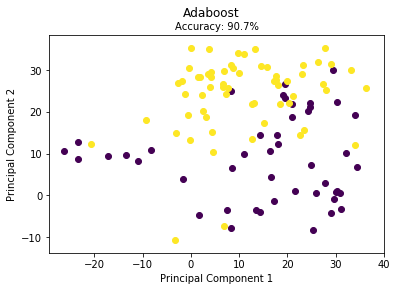

In [10]:
cmap = plt.get_cmap('viridis')

X_transformed = transform(X_test, dim=2)
x1 = X_transformed[:,0]
x2 = X_transformed[:,1]
class_distr = []

y = np.array(y_pred).astype(int)

colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

for i, l in enumerate(np.unique(y)):
    _x1 = x1[y==l]
    _x2 = x2[y==l]
    _y = y[y==l]
    class_distr.append(plt.scatter(_x1, _x2, color = colors[i]))

    
perc = 100*accuracy
plt.suptitle("Adaboost")
plt.title("Accuracy: %.1f%%" % perc, fontsize=10)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## sklearn 里的 Adaboost

In [11]:
from sklearn.ensemble import AdaBoostClassifier

cls = AdaBoostClassifier(n_estimators = 10, learning_rate = 0.5)
cls.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=10, random_state=None)

scikit-learn 实现了两种 Adaboost 分类算法，SAMME 和 SAMME.R。两者的主要区别是弱学习器权重的度量，SAMME 用样本集分类效果作为弱学习器权重，而SAMME.R 使用分类预测概率值来作为弱学习器权重。后者是连续值所以迭代一般比 SAMME 快，因此 AdaBoostClassifier 的默认算法 algorithm 的值也是SAMME.R。注意，使用 SAMME.R 时弱分类学习器参数 base_estimator 必须限制使用支持概率预测的分类器。SAMME 算法则没有这个限制。

In [12]:
cls.score(X_test, y_test)

0.9439252336448598